In [ ]:
from IPython.display import Image

In [2]:
Image(filename='1.PNG')

FileNotFoundError: [Errno 2] No such file or directory: '1.PNG'

In [ ]:
Image(filename='2.PNG')

## Machine Learning Workflow

<img src='./data-science-explore.png' width=800>

- Iterative process
- Non-linear process
- Lots of judgement and refining along the way
- Lots of time spent in data prep
- "Big data": a lot of time can be spent in data retrieval

Source: Practical Machine Learning with Python, Apress/Springer

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Data Retrieval
- We've covered a lot of this
- SQL, APIs, Web Scraping, csv, Excel...
- Could include combining some of the above
- Also called "Data Ingestion"

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Data Preparation
- **Processing and Wrangling**: Covered this too, `pandas` etc.
- **Feature extraction and engineering**: Will go over this today. What features (i.e., variables, `x`) do I need for my problem?
- **Feature scaling and selection**: To be covered

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Modeling (i.e., machine learning)
- `scikit-learn` being the main basic package
- Other packages for deep learning
- Supervised vs. unsupervised learning
- "Build a model"

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Machine Learning Algorithm
- **"Algorithm"**: series of steps based on rules that a computer takes to calculate something
- Within supervised:
    - Regression: `y` is a continuous number (e.g., price)
    - Classification: `y` is discrete (e.g., positive or negative diagnosis)
- Examples: decision trees, linear regression, neural networks
    

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Model Evaluation & Tuning
- Our first model will probably not be the best model; need to pick
- **Evaluation**: Using metrics to pick the best model for the use case
- **Tuning**: Besides picking between algorithms, there are 'knobs' / settings to 'tune' a model for a specific algorithm

## Machine Learning Workflow

<img src='./data-science-explore.png' width=600>

### Deployment & Monitoring
- We picked a model and it's ready for use by our users
- Be careful about concept drift
- Models sometimes need to be re-trained

## Types of Questions


| Type of question | Description | Example |
|:---|:--------------------------|:----------------|
| **Descriptive** | Summarize a characteristic of a set of data| Proportion of males, the mean number of servings of fresh fruits and vegetables per day |
| **Exploratory** | Analyze the data to see if there are patterns, trends, or relationships between variables; “hypothesis-generating” analyses|If you had a general thought that diet was linked somehow to viral illnesses, start by examining relationships between a range of dietary factors and viral illnesses|
| **Inferential** | Testing a hypothesis, statistically |Analyzing data for a subset / sample of the population and generalizing insights for the general population; Is there a higher incidence of cancer for women than for men?|
| **Predictive**  | Predicting a value, not necessarily figuring out why| Predicting cancer diagnosis from x-rays using computer vision|
| **Causal**      | Whether changing one factor will change another factor | Does changing diet lead to higher incidence of cancer?|
| **Mechanistic** | Understanding *how* one factor changes another | How does diet lead to higher incidence of cancer? |

## Data Preparation
- **Goal**: Preparing data for answering an exploratory, inferential or predictive question
- Common techniques:
    1. Outlier detection
    *  Null values
    *  Variable transformation

## Data Preparation: Outlier Detection

- Data is not always right
- Could be human error, could be system error
- **Outlier**: an observation point that is distant from other observations
- Helpful to pointing us what can be wrong
- Some errors are obvious; many require interviewing the domain experts to figure out

**Goal**: show you some tools to identify outliers

### Outlier Detection: demo
- Docs: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
- [Example source](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [4]:
# documentation: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Outlier Detection: summary of the data
- Do a gut check
- Ask the domain expert

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Outlier Detection: visualization (single variable)

In [8]:
plt.style.use('dark_background')

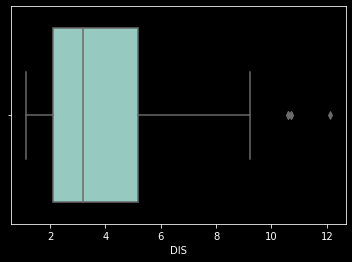

In [9]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS']);

### Outlier Detection: visualization (multi-variable)

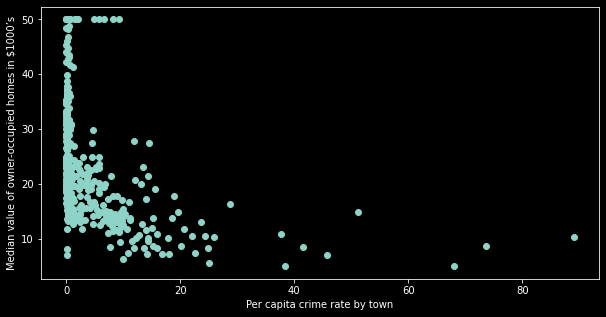

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(boston_df['CRIM'], y)
ax.set_xlabel('Per capita crime rate by town')
ax.set_ylabel('Median value of owner-occupied homes in $1000’s')
plt.show()

### Outlier detection

**Solution:**
- Can use something like `df.replace` to replace values
- Can drop the record if we don't know the right number

## Data Preparation: Null values

- Sometimes values will be blank in your data
- It could be an error; it could be the data was not available
- There are some techniques to deal with it; all of them are imperfect
- These techniques should be employed only if you can't get better data

Resource: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/


### Null values: Demo
- Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#

In [14]:
db_path = '/home/vanderscycle/Documents/Lighthouse-lab/Databases/w3-d3-db/archive/diabetes.csv'
diabetes_df = pd.read_csv(db_path)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Null values: Summary of the data
- Sometimes null values aren't exactly NaNs
- They are encoded as -1 or 9999 etc.
- Sometimes it's 0. 
- Does 0 make sense for some of these categories??

In [15]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Null values: Encoding true NaNs as NaNs
- Won't be used in summary calculations (e.g., average, count)
- Some columns have a lot of what we think could be missing values

In [16]:
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with missing values
(diabetes_df[cols_missing_vals] == 0).sum() # count number of 0s

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

np.NaN won't affect the stats calculation

In [17]:
# replace 0's with NaNs
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN)
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Null values: Removing rows with missing values
- Could be a good idea if there aren't too many records removed
- Let's do this for Glucose and BMI columns

In [18]:
print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose and BMI columns (752, 9)


### Null values: using the average

In [19]:
# Fill in missing values with the average
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean())
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness                 0
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Null values: interpolation, forward fill, backward fill, etc.

In [20]:
# doesn't make sense here, but show documentation
# diabetes_df.fillna(method='ffill')
# diabetes_df.interpolate(method='linear')

## Data Preparation: Variable Transformation

- Basic transformations (e.g., logarithmic)
- Binning (e.g., grouping numbers into bins)
- Scaling (e.g., setting everything between 0 and 1)
- One hot encoding - dummy variables (e.g., turning categories into multiple columns of binary variables)

Will learn more when we get into `scikit-learn` library

## Pandas profiling

Very useful! Great for exploratory data analysis.

`conda install -c conda-forge pandas-profiling`

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(diabetes_df)
prof.to_file(output_file='output.html')

## Feature Engineering

<blockquote>
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.<br> 
- Jason Brownlee    
</blockquote>    

- If your features, i.e., representation is bad, whatever fancier model you build is not going to help.

A quote by Pedro Domingos [A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

## Feature Engineering

<blockquote>
... At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used. 
</blockquote>


A quote by Andrew Ng, [Machine Learning and AI via Brain simulations](https://ai.stanford.edu/~ang/slides/DeepLearning-Mar2013.pptx)

<blockquote>
Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.
</blockquote>

- Better features: more flexibility, we can get by with simple models, better accuracy 

## Feature Engineering

#### Better features usually help more than a better model.
- Good features would ideally:
    - capture most important aspects of the problem
    - allow learning with few examples 
    - generalize to new scenarios.
    
    
#### The best features may be dependent on the model you use.

#### The best features are very domain and problem specific.

### Feature Engineering: Examples

<br>
<br>

**Example 1:** Taking a date and extracting out the week number, weekday, month etc. 

Sales is often based on seasonality.

### Feature Engineering: Examples

<br>
<br>

**Example 2:** Taking freeform text (e.g., tweets) and extracting number of words, counts of words, punctuation etc.

Text "metadata" can sometimes help with sentiment analysis.

### Feature Engineering: Examples

<br>
<br>

**Example 3:** Locating faces in an image or face detection using computer vision algorithms.
<img src='./features1.jpeg' width=600>
You need to have visual features that are representative of the types of shadings and shapes you're looking for. In the case of faces we can use special features called haar features that pick up on faces in an image.
<img src='./features2.png' width=600>
